In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
loaded_data = np.load("data_1762427561.npz")
loaded_data2 = np.load("noise_data_1762507995.npz")
loaded_data3 = np.load("noise_data_1762510386.npz")
loaded_data4 = np.load("data_1762423987.npz")
loaded_data5 = np.load("data_1762425388.npz")

voltRange = [1.5]
R0 = 1000
# Config
run = 10
timeConst = 1  # in seconds

In [50]:
X1 =  loaded_data["data"][:, :, 3]
X2 = loaded_data2["data"][:, :, 3]
X3 = loaded_data3["data"][:, :, 3]
X4 = loaded_data4["data"][:, :, 3]
X5 = loaded_data5["data"][:, :, 3]


freqRange_coll = loaded_data["freqRange"][:]
freqRange_coll2 = loaded_data2["freqRange"][:]
freqRange_coll3 = loaded_data3["freqRange"][:]
freqRange_coll4 = loaded_data4["freqRange"][:]
freqRange_coll5 = loaded_data5["freqRange"][:]


In [51]:
noiseX = loaded_data["noise"][:, :, 0].flatten()
noiseR = loaded_data["noise"][:, :, 2].flatten()
noiseY = loaded_data["noise"][:, :, 1].flatten()
noiseTheta = loaded_data["noise"][:, :, 3].flatten()

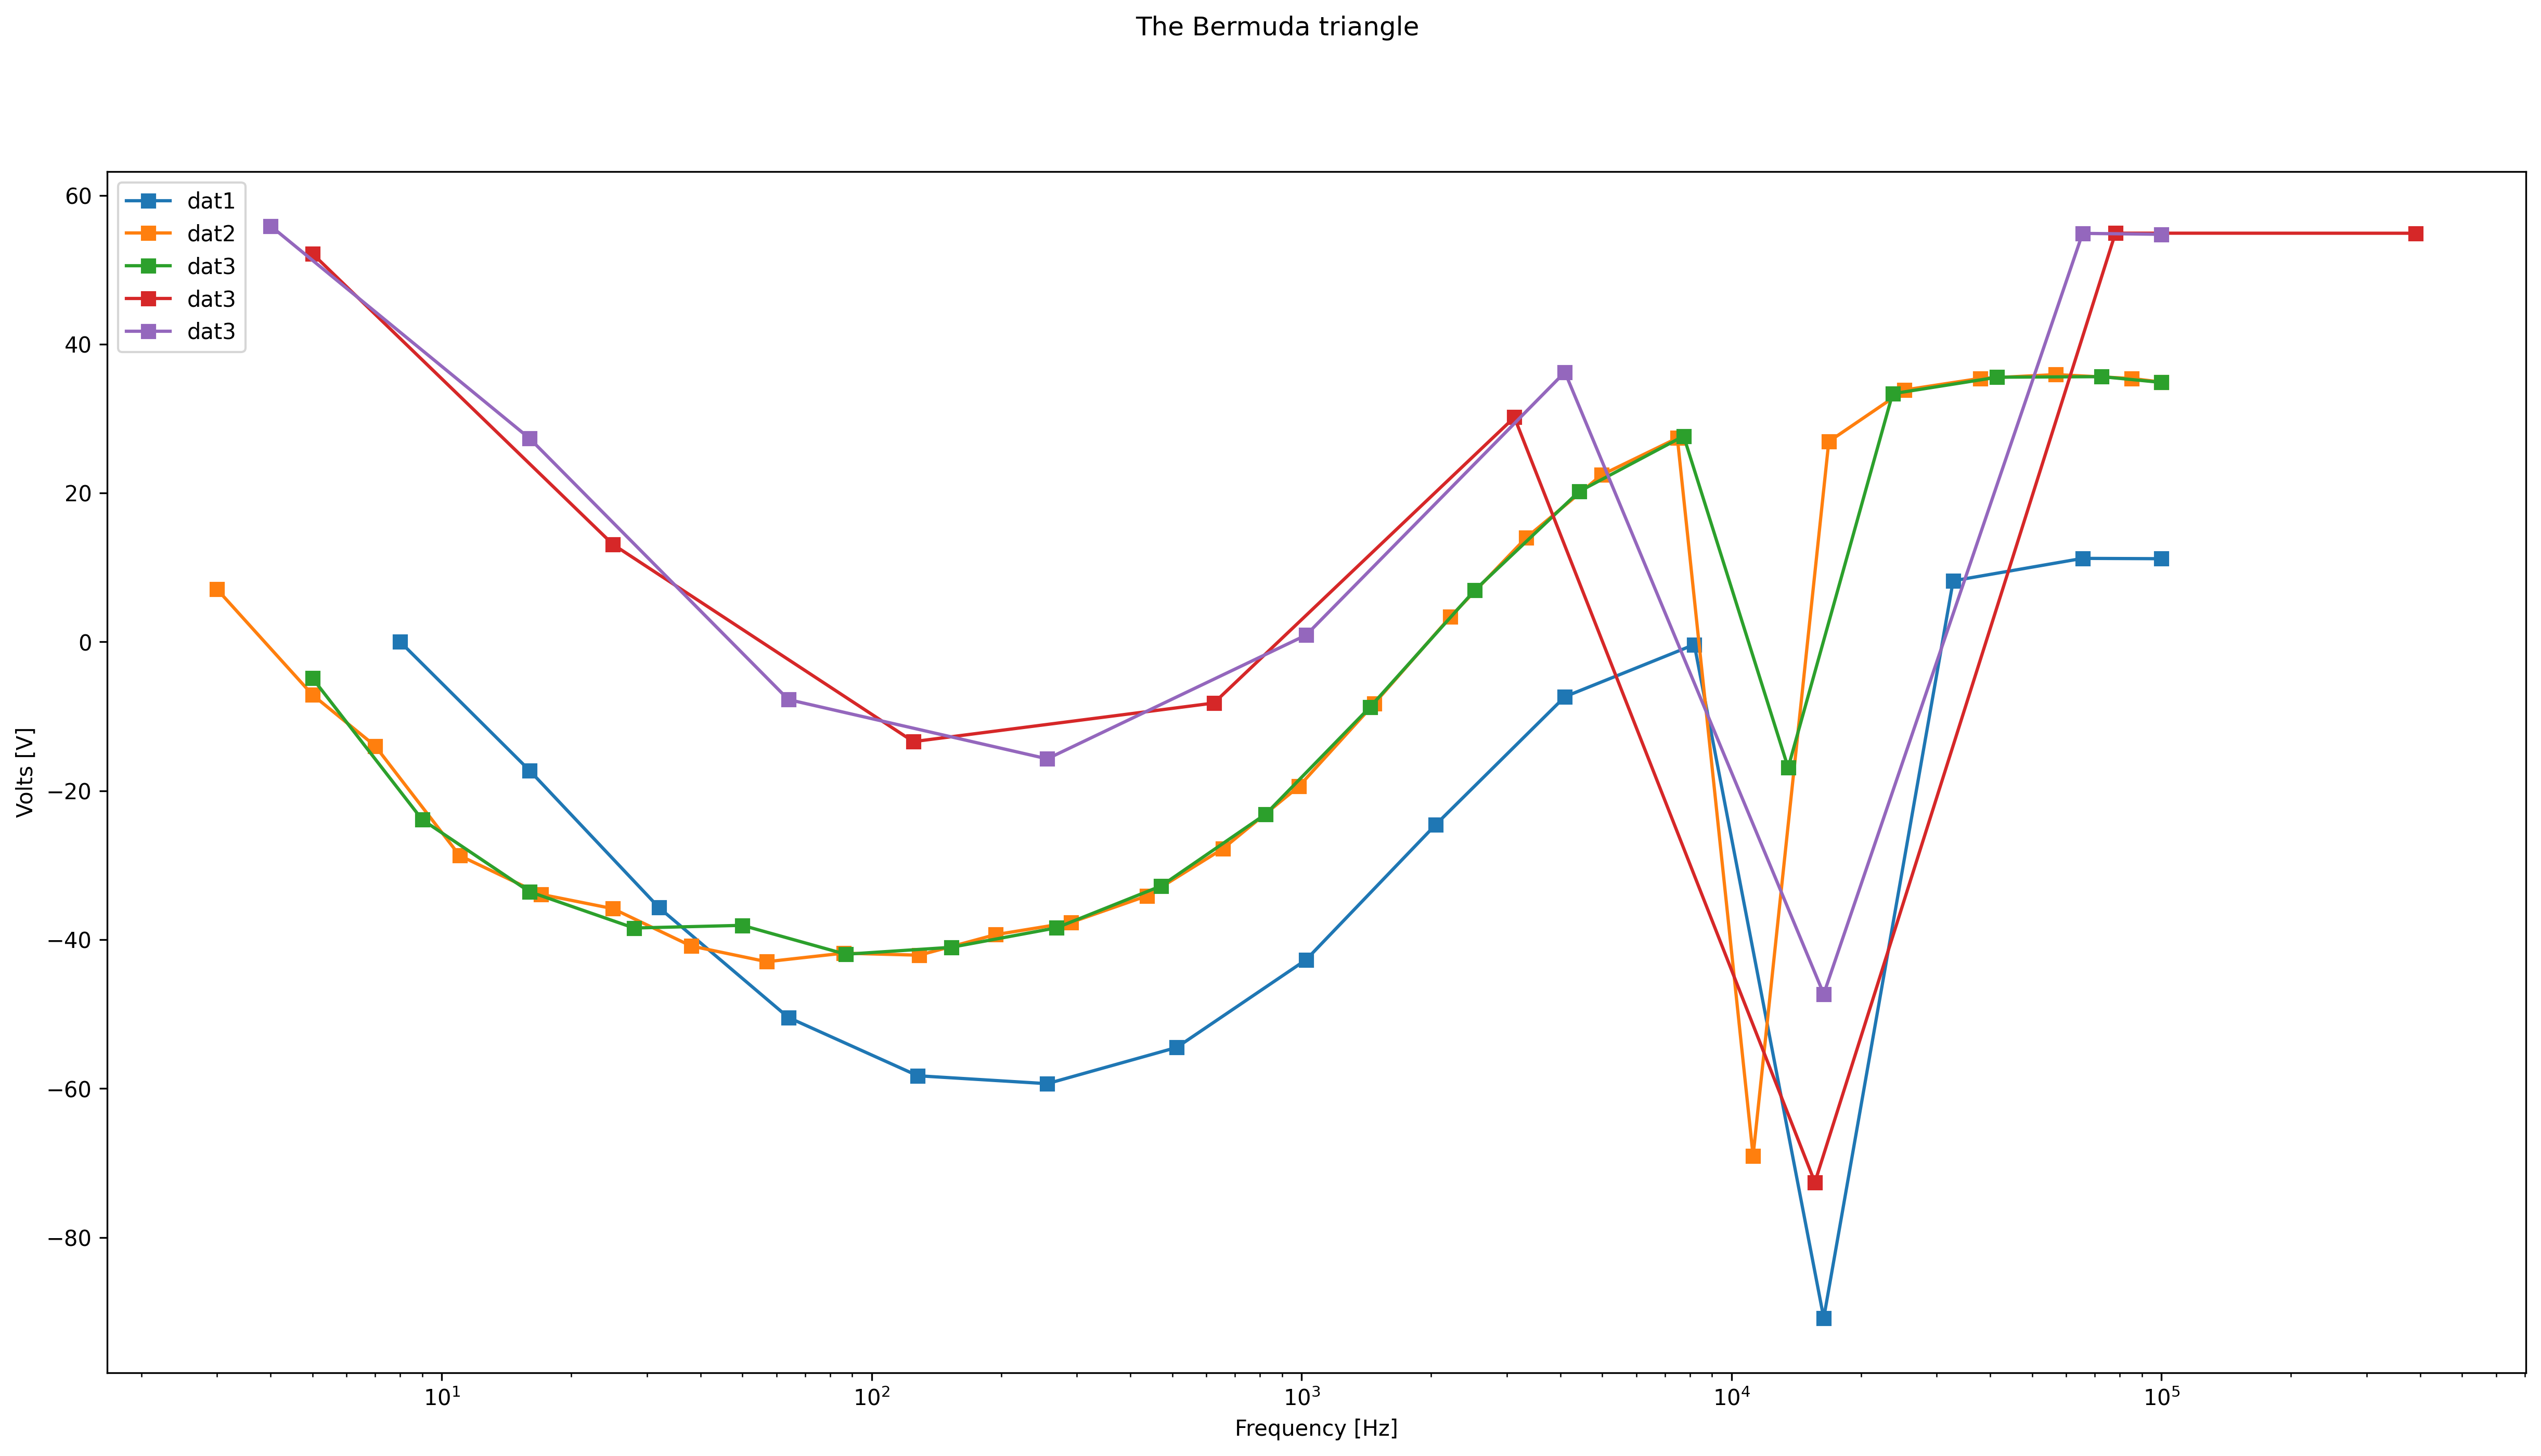

In [53]:
fig, axes = plt.subplots(1, 1, dpi=300, figsize=(20,10))
ax = axes
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Volts [V]")
ax.set_xscale("log")
# ax.scatter(freqRange_coll, R)
ax.plot(freqRange_coll, X1, marker = "s", label="dat1")
ax.plot(freqRange_coll2, X2, marker = "s", label = "dat2")
ax.plot(freqRange_coll3, X3, marker = "s", label = "dat3")
ax.plot(freqRange_coll4, X4, marker = "s", label = "dat3")
ax.plot(freqRange_coll5, X5, marker = "s", label = "dat3")
fig.suptitle("The Bermuda triangle")
ax.legend()

fig.savefig("Phase_vs_freq.png", dpi=300)

In [64]:
loaded_data = np.load("sync_filteron_act_noise_data_1762512505.npz")



In [65]:
X = loaded_data["data"][:, :, 0]
Y = loaded_data["data"][:, :, 1]
R = loaded_data["data"][:, :, 2]
Theta = loaded_data["data"][:, :, 3]
freqRange_coll = loaded_data["freqRange"][:]
noise_coll = loaded_data["noise"]
Resistance = 1e3 * R0 * R / voltRange[0]
ResistanceX = 1e3 * R0 * X / voltRange[0]

In [66]:
noiseX = np.asarray(loaded_data["noise"][:, :, 0].flatten())
noiseR = loaded_data["noise"][:, :, 2].flatten()
noiseY = loaded_data["noise"][:, :, 1].flatten()
noiseTheta = loaded_data["noise"][:, :, 3].flatten()

In [67]:
from scipy.optimize import curve_fit
fc_cutoff = -1
def linfit(x,a,b):
    y = a*x+b
    return y
def logfit(x,a,b,c):
    y = a/(np.pow(x,b))
    y = y+c
    return y
xf = np.log(freqRange_coll[:fc_cutoff])
yf = np.log((noiseX**2)[:fc_cutoff])

xf1 = freqRange_coll[:fc_cutoff]
yf1 = (noiseX**2)[:fc_cutoff]

params, pcov = curve_fit(linfit, xf,yf)
params1, pcov1 = curve_fit(logfit, xf1,yf1, p0 = [0,2,0], maxfev = 10000)
perr = np.sqrt(np.diag(pcov))
perr1 = np.sqrt(np.diag(pcov1))

params, perr,params1, perr1

C:\Users\iamsa\AppData\Local\Temp\ipykernel_15336\2654554307.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  params1, pcov1 = curve_fit(logfit, xf1,yf1, p0 = [0,2,0], maxfev = 10000)


(array([ -1.06104132, -28.84921553]),
 array([0.12051014, 0.799091  ]),
 array([3.82811471e-12, 2.00000000e+00, 3.86948414e-16]),
 array([inf, inf, inf]))